In [ ]:
!pip install -q scikit-learn matplotlib pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.sparse.csgraph import shortest_path
from sklearn.manifold import MDS


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving distances (1).csv to distances (1).csv


In [ ]:
df = pd.read_csv("distances (1).csv")
city_names = df.columns[1:]
dist_matrix = df.iloc[:, 1:].values
n_cities = len(city_names)


#ISOmap-Implementation with skLearn

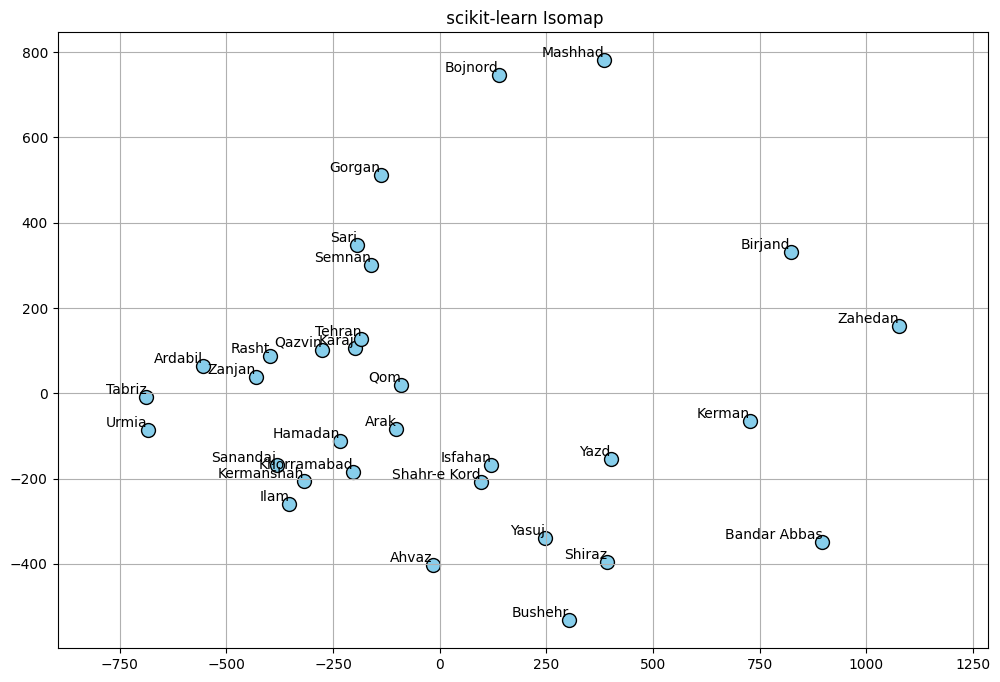

In [ ]:
import pandas as pd
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

df = pd.read_csv("distances (1).csv")
city_names = df.columns[1:].tolist()
distance_matrix = df.iloc[:, 1:].values
isomap = Isomap(n_neighbors=5, n_components=2, metric='precomputed')
embedding_sklearn = isomap.fit_transform(distance_matrix)

def plot_embedding(embedding, title, city_names):
    plt.figure(figsize=(12, 8))
    plt.scatter(embedding[:, 0], embedding[:, 1], c='skyblue', edgecolors='k', s=100)
    for i, name in enumerate(city_names):
        plt.text(embedding[i, 0], embedding[i, 1], name, fontsize=10, ha='right', va='bottom')
    plt.title(title)
    plt.grid(True)
    plt.axis('equal')
    plt.show()

plot_embedding(embedding_sklearn, " scikit-learn Isomap", city_names)


#Applying rotation and reflection

In [ ]:
def rotate_points(points, angle_deg):
    angle_rad = np.deg2rad(angle_deg)
    rotation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad),  np.cos(angle_rad)]
    ])
    return points @ rotation_matrix.T


def reflect_points(points, axis='x'):
    if axis == 'x':
        return points * np.array([1, -1])
    elif axis == 'y':
        return points * np.array([-1, 1])
    else:
        return points

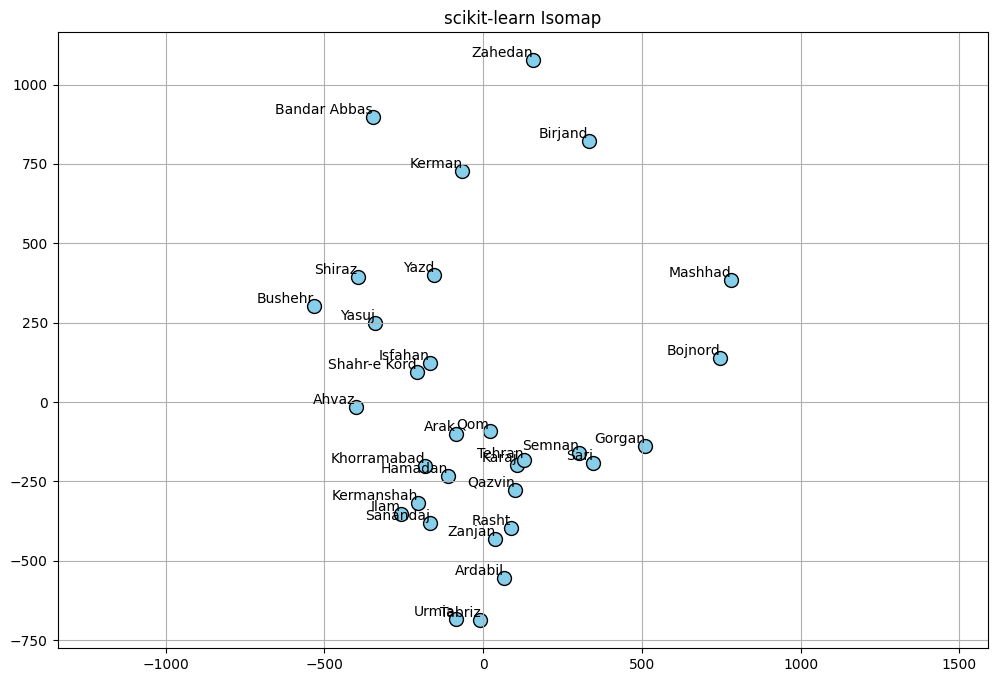

In [ ]:
adjusted_sklearn = rotate_points(embedding_sklearn,90)
adjusted_sklearn = reflect_points(adjusted_sklearn, axis='y')

plot_embedding(adjusted_sklearn, "scikit-learn Isomap" , city_names)


#Final result

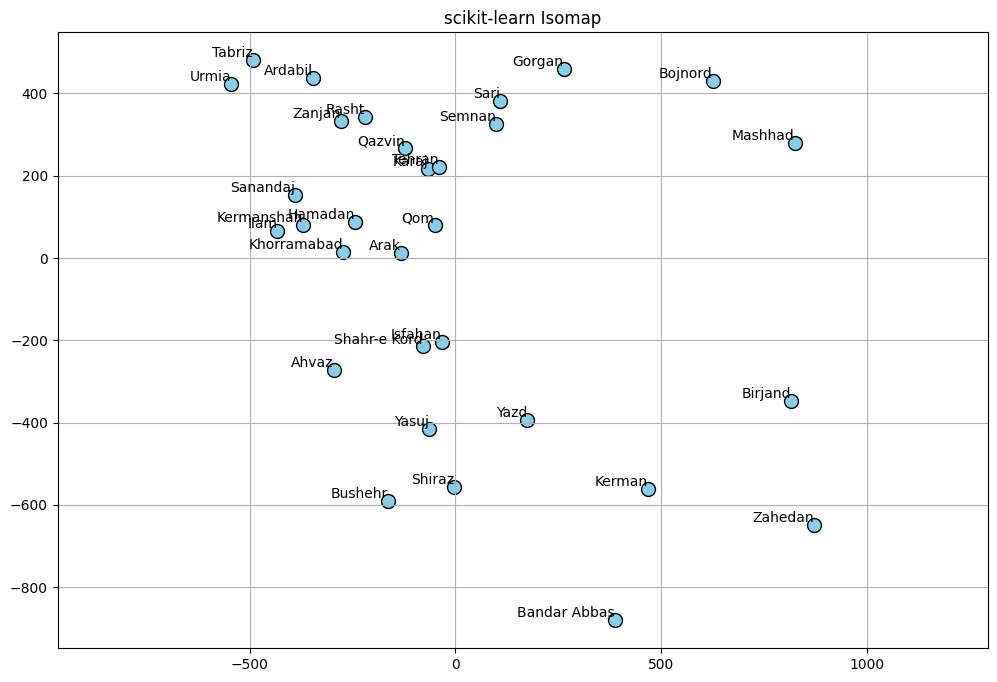

In [ ]:
adjusted_sklearn = rotate_points(embedding_sklearn,-45)
plot_embedding(adjusted_sklearn, "scikit-learn Isomap", city_names)